Averaged Image for a Word
==============

In [20]:
%matplotlib inline

import gzip
import numpy as np
import csv
from collections import Counter, defaultdict
import matplotlib.pyplot as plt

In [6]:
# Load files
inputFile = 'data/cat_desc_wn.csv'
headers = None
descCnt = Counter()
catCnt = Counter()
descCatCnt = defaultdict(Counter)
with open(inputFile) as fin:
    r = csv.reader(fin)
    for row in r:
        if headers is None:
            headers = row
            print headers
        else:
            cat, desc, cnt = row
            cat = int(cat) - 1
            cnt = int(cnt)
            descCnt[desc] += cnt
            catCnt[cat] += cnt
            descCatCnt[desc][cat] += cnt

with gzip.open('data/avgImgByCat.npy.gz', 'rb') as fin:
    avgImgCat = np.load(fin)

['category_id', 'description', 'count']


In [68]:
def intensify(tmp):
    tmp -= np.min(tmp)
    tmp /= np.max(tmp)

def wordImg(w):
    if w not in descCatCnt:
        raise RuntimeError('Word not found')
    imgShape = avgImgCat.shape[1:]
    tmp = np.zeros(imgShape)
    for cat, cnt in descCatCnt[w].iteritems():
        tmp += float(cnt) * avgImgCat[cat]
    tmp /= float(descCnt[w])
    tmp -= np.min(tmp)
    tmp /= np.max(tmp)
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(1,1,1)
    ax.imshow(tmp)
    ax.axis('off')
    fig.show()
#     return tmp

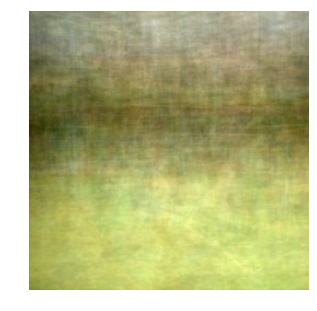

In [69]:
wordImg('badminton_court')
# plt.figure(figsize=(4.5,4.5))
# imshow(avgImgCat[1022] / 255.0)

viewpoint
labour
pot
mechanist
tile
photography
public
group
dark
damages
chamber
set
top
night
gat
iron
friend
avenue
image
workman
walking
indoor
material
institute
arts
reading
exit
organisation
humans
grain
lamp
decoration
watching
storage_area
rest_area
lighting
celebration
wooden
couple
assembly
sculpture
doom
tourist
stalls
interior
manufacturing
display
stand
palm_tree
structure


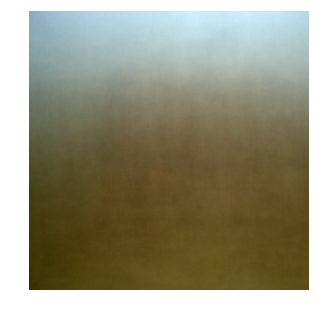

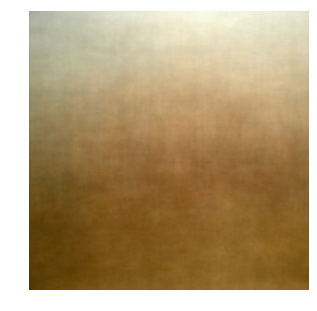

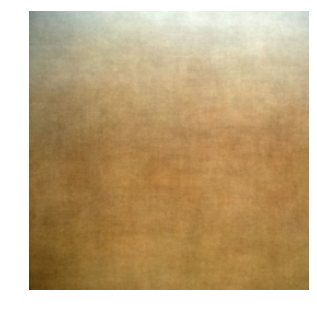

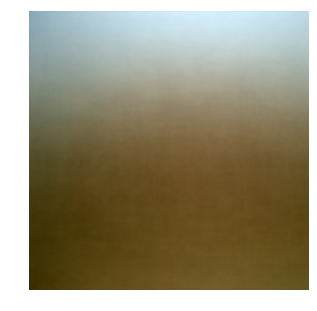

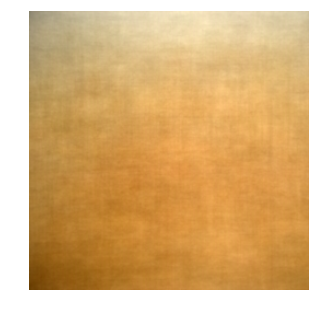

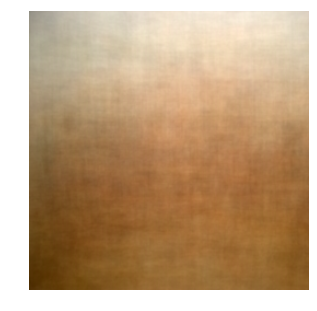

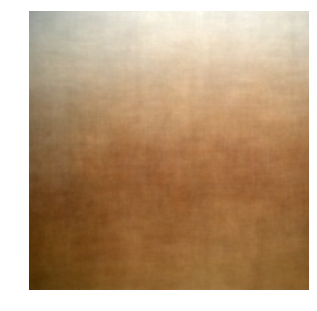

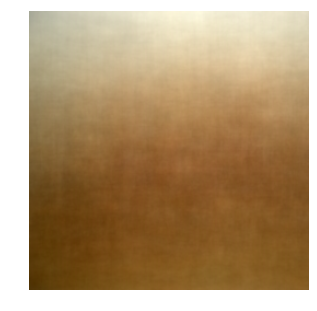

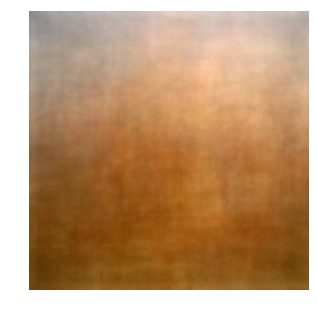

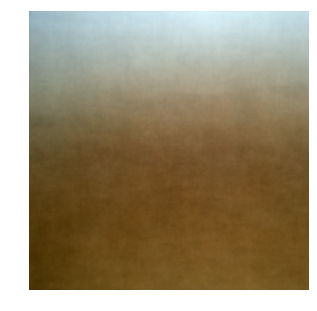

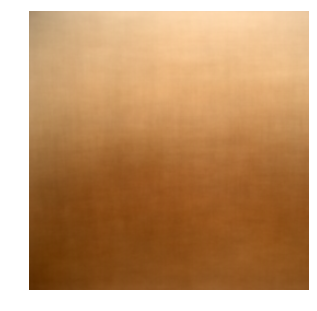

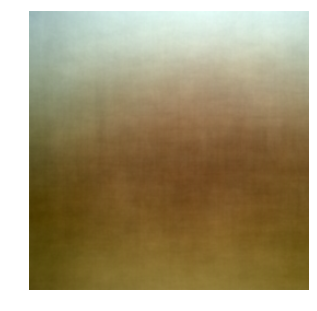

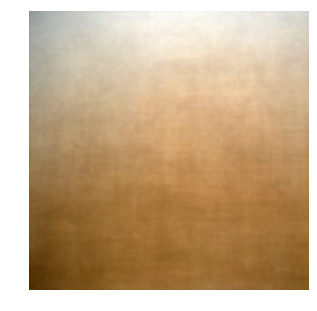

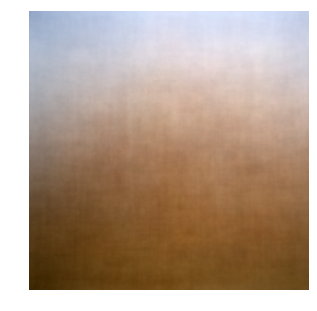

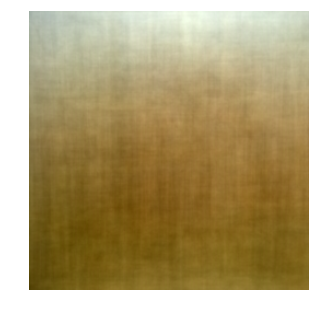

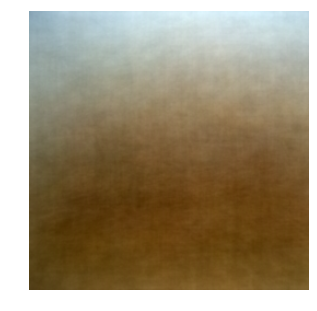

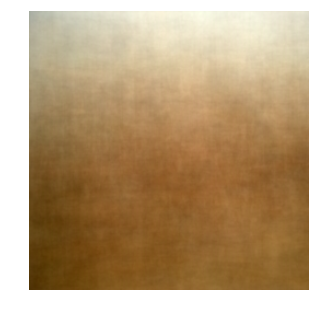

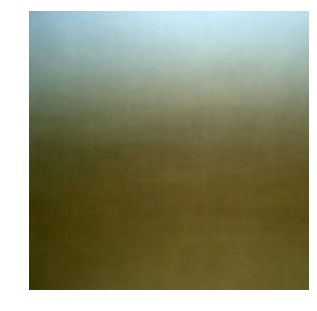

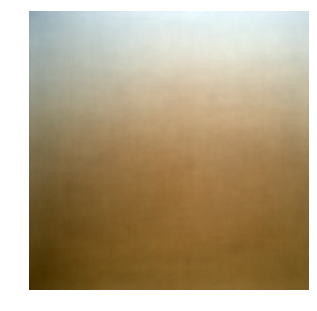

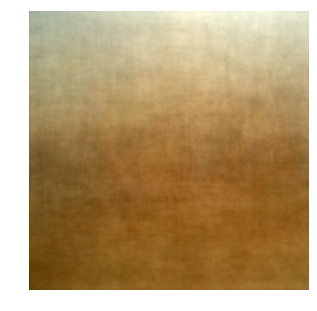

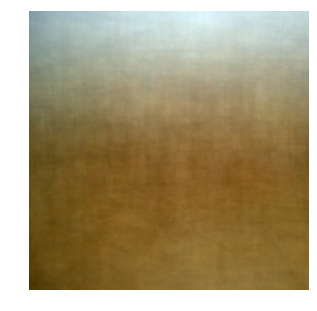

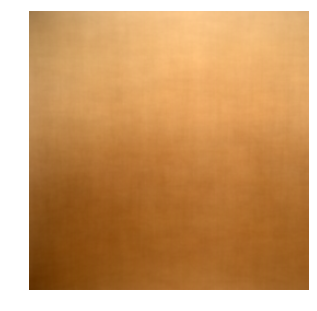

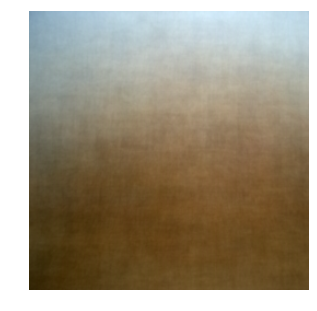

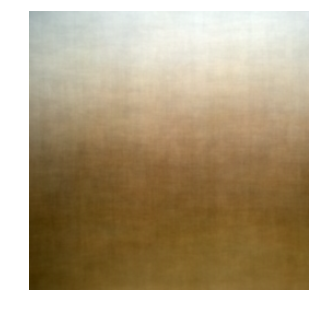

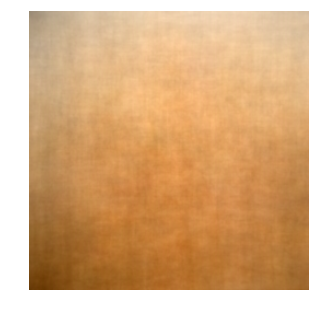

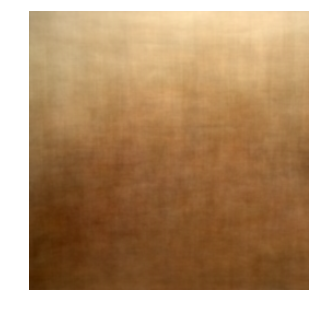

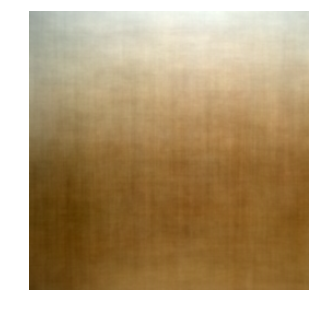

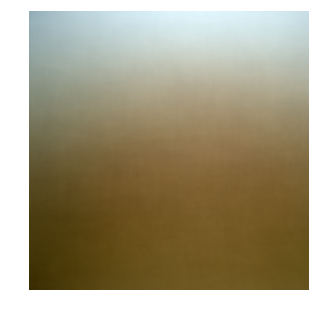

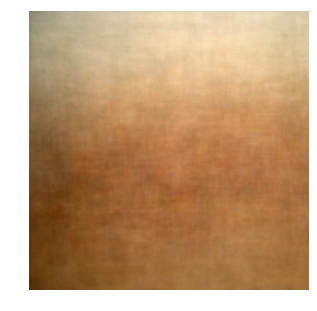

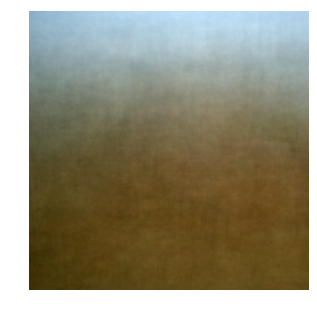

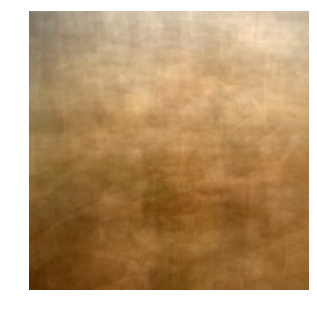

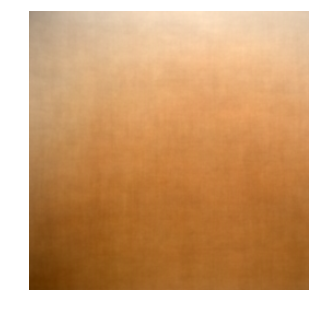

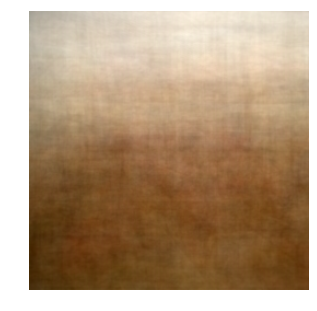

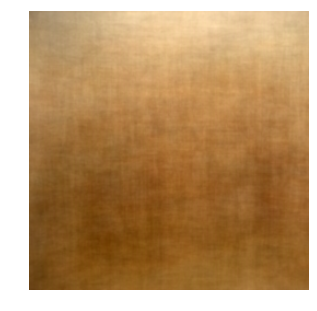

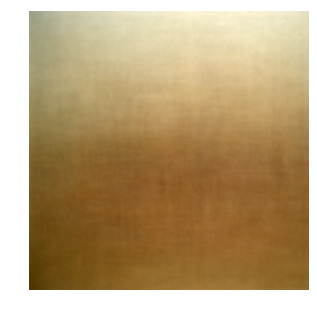

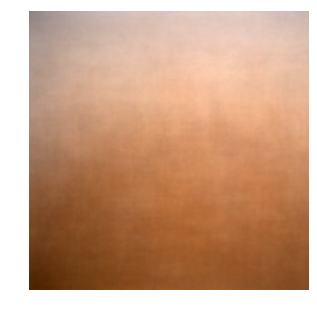

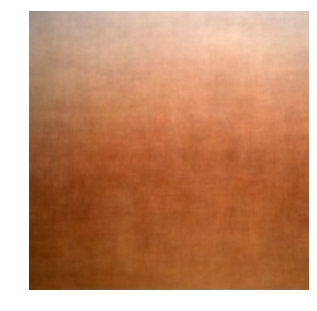

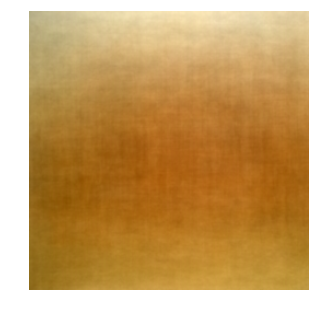

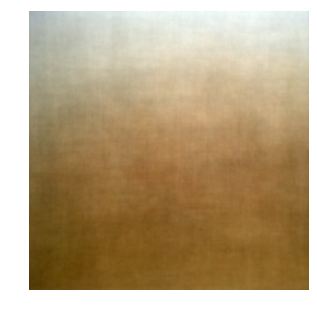

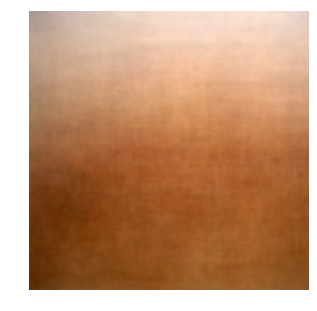

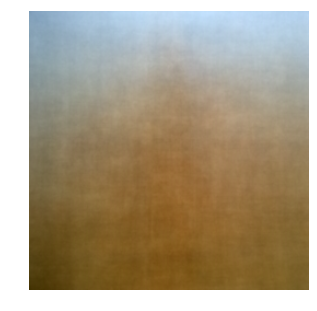

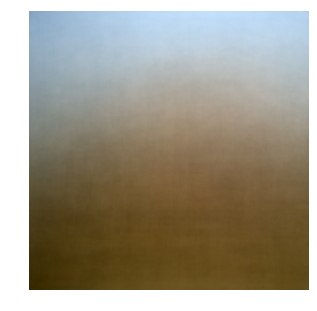

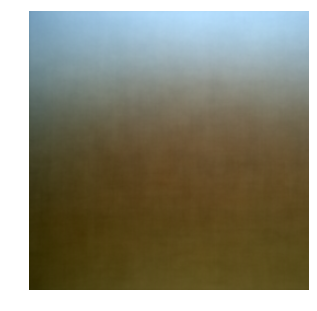

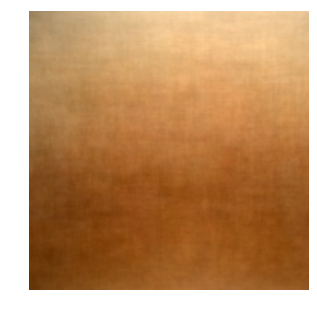

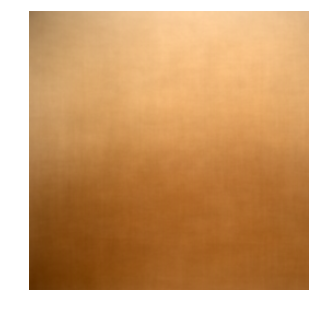

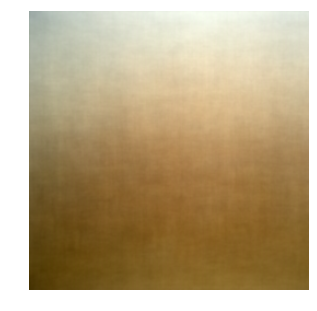

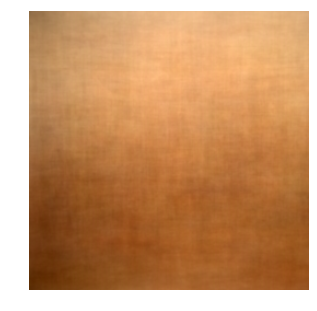

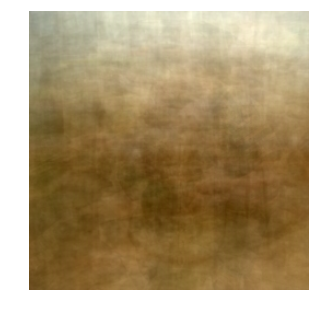

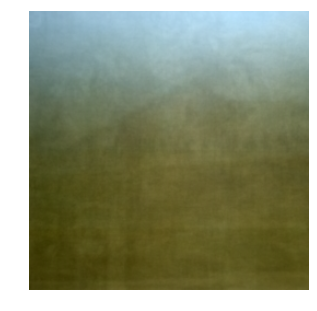

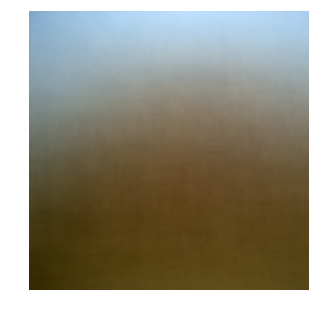

In [76]:
lst1 = ['mountain', 'waterfall', 'sea', 'church', 'bedroom', 'factory', 'house', 'telephone_booth',
       'stadium', 'falls', 'building', 'forest', 'swimming_pool', 'river', 'escalator', 'restaurant',
       'carousel', 'windmill', 'garden', 'water', 'lake', 'shop', 'aquarium', 'barbershop', 'hill',
       'playground', 'gym', 'underwater', 'bathroom', 'ocean', 'circus', 'bridge', 'hospital', 'palace',
       'highway', 'beach', 'office', 'road', 'massage', 'bowling_alley', 'train', 'car_port', 'ball', 'rock',
       'bakery', 'batting_cage', 'boxing', 'phone_booth', 'bus', 'bowling', 'pharmacy', 'shooting_range',
       'auditorium', 'fort', 'karate', 'airport', 'basketball_court', 'car_race', 'helicopter', 'ship',
       'martial_art', 'cockpit', 'pig', 'classroom', 'washing_machine', 'golf_course', 'bathtub', 'carport',
       'cave', 'library', 'billiards', 'boxing_ring', 'hen', 'car', 'pond', 'badminton_court', 'hot_tub', 'dog',
       'undersea', 'playschool', 'volcano', 'bullfight', 'baseball_field', 'night_club', 'nature', 'kitchen',
       'apartment', 'snow', 'arcade', 'machine', 'courtroom', 'football_field', 'shoe_shop', 'tennis_court',
       'fish', 'stonehenge', 'gas_station', 'toilet', 'home', 'canyon']
lst2 = ['viewpoint', 'labour', 'pot', 'mechanist', 'tile', 'photography', 'public', 'group', 'dark', 'damages',
        'chamber', 'set', 'top', 'night', 'gat', 'iron', 'friend', 'avenue', 'image', 'workman', 'walking',
        'indoor', 'material', 'institute', 'arts', 'reading', 'exit', 'organisation', 'humans', 'grain', 'lamp',
        'decoration', 'watching', 'storage_area', 'rest_area', 'lighting', 'celebration', 'wooden', 'couple',
        'assembly', 'sculpture', 'doom', 'tourist', 'stalls', 'interior', 'manufacturing', 'display', 'stand',
        'palm_tree', 'structure']
for w in lst2[:50]:
    print w
    wordImg(w)